<a href="https://colab.research.google.com/github/majidali321/MLP-in-TF/blob/main/MLP_by_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Perceptron

Predicting Tips Using Deep Learning in TensorFlow
This notebook demonstrates how to build and train a deep learning regression model using TensorFlow to predict tips based on various restaurant bill-related features. The dataset used is the Seaborn "tips" dataset.

📌 Steps Covered in This Notebook:

1️⃣ Load & Preprocess Data (Handle categorical variables, standardize data)

2️⃣ Build a Neural Network Model (Using TensorFlow & Keras)

3️⃣ Train the Model (Using Adam optimizer and MSE loss)

4️⃣ Evaluate Model Performance

🔹 Dataset: Seaborn "tips" dataset
🔹 Algorithm: Deep Neural Network
🔹 Task: Regression (Predicting tip amounts)

📌 Let's dive into the implementation! 🚀

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 10.0383 - mae: 2.8929
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.0012 - mae: 2.4978
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8560 - mae: 2.2942  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.3081 - mae: 1.8492
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9034 - mae: 1.5496 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9674 - mae: 1.3072 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4627 - mae: 1.1745
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1603 - mae: 1.0998 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9368 - mae: 1.0185
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5693 - mae: 0.9302
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5067 - mae: 0.9282 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4792 - mae: 0.9166
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

Deep Learning Model for Tip Prediction: Training & Evaluation
In this section, we build, train, and evaluate a deep learning regression model using TensorFlow. The model is trained to predict tips based on restaurant bill-related features from the Seaborn "tips" dataset.

📌 Steps Covered:

1️⃣ Build the Neural Network Model

Input Layer: 64 neurons with ReLU activation
Hidden Layer: 32 neurons with ReLU activation
Output Layer: 1 neuron for regression output

2️⃣ Train the Model

Optimizer: Adam
Loss Function: Mean Squared Error
Training with validation split

3️⃣ Evaluate Model Performance

Compute test loss
Plot training & validation loss over epochs
🔹 Task: Regression (Tip amount prediction)
🔹 Dataset: Seaborn "tips" dataset
🔹 Visualization: Loss curve for training and validation

📌 Let's analyze the model performance! 📊🚀

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


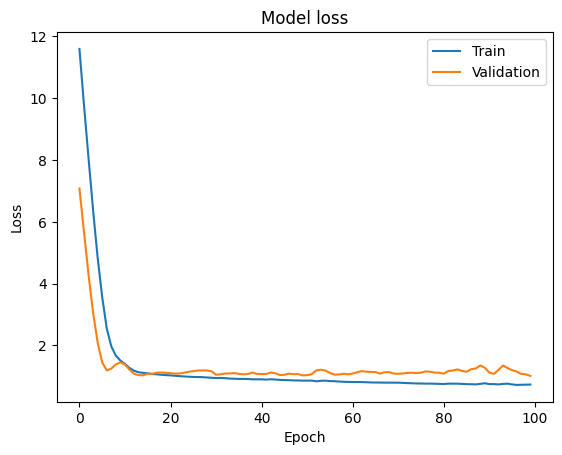

In [3]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Deep Learning Model for Tip Prediction with Early Stopping
In this section, we build, train, and evaluate a deep learning regression model using TensorFlow, with an Early Stopping callback to prevent overfitting.

📌 Steps Covered:

1️⃣ Build the Neural Network Model

Input Layer: 64 neurons with ReLU activation
Hidden Layer: 32 neurons with ReLU activation
Output Layer: 1 neuron for regression output

2️⃣ Train the Model with Early Stopping

Optimizer: Adam
Loss Function: Mean Squared Error
EarlyStopping Callback: Stops training if validation loss does not improve for 5 consecutive epochs

3️⃣ Evaluate Model Performance

Compute test loss
Plot training & validation loss over epochs
🔹 Task: Regression (Tip amount prediction)
🔹 Dataset: Seaborn "tips" dataset
🔹 Callback: EarlyStopping (patience=5)
🔹 Visualization: Loss curve for training and validation

📌 Let's see how early stopping improves model efficiency! 🚀📊

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 12.4106 - val_loss: 6.6863
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4946 - val_loss: 5.0894
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7872 - val_loss: 3.7867
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6932 - val_loss: 2.7076
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.5734 - val_loss: 1.8659
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4578 - val_loss: 1.2822
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5607 - val_loss: 0.9596
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1016 - val_loss: 0.8366
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7072 - val_loss: 0.8591
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4417 - val_loss: 0.9155
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4884 - val_loss: 0.9788
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3074 - val_loss: 0.9613


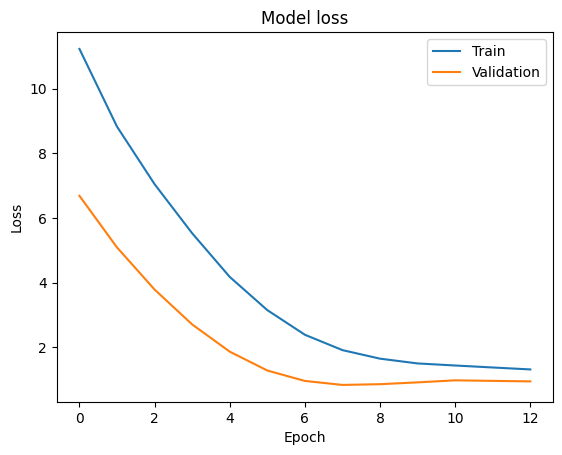

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()